<H5> Importing necessary Libraries </H5>

In [1]:
from fastai.vision.all import *
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from pathlib import Path

<H5>Path to Data Sets</H5>

In [2]:
# Define the paths
path = Path('Dataset')
train_path = path/'Train'
test_path = path/'Test'

<Hr>

<H5>Data Argumentation </H5>

In [3]:
# Define data augmentation
item_tfms = [Resize(224)]
batch_tfms = aug_transforms(do_flip=True, flip_vert=True, max_rotate=30.0, max_zoom=1.2, max_lighting=0.2, max_warp=0.2)


In [4]:
# Define DataBlock with augmentation
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
    get_y=parent_label,
    item_tfms=item_tfms,
    batch_tfms=batch_tfms
)

# Load the data
dls = dblock.dataloaders(path, bs=16)


In [5]:
# Calculate class weights
def get_class_weights(dls):
    y_train = np.concatenate([y.numpy() for _, y in dls.train])
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    return torch.tensor(class_weights, dtype=torch.float)

class_weights = get_class_weights(dls)


In [6]:
# Define the learner with the class weights
learn = vision_learner(dls, resnet34, metrics=accuracy, loss_func=CrossEntropyLossFlat(weight=class_weights))

<Hr>

<H5>Model Training</H5>

SuggestedLRs(valley=0.0020892962347716093)

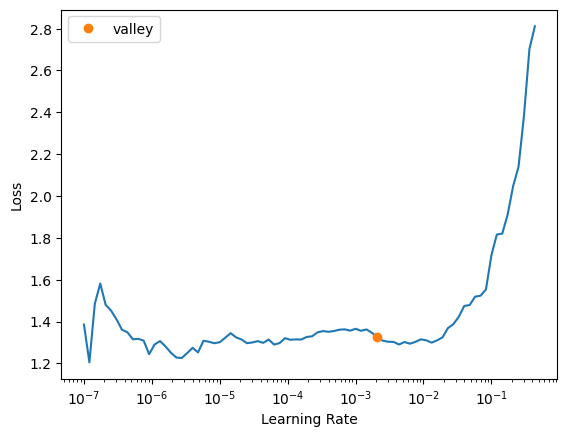

In [14]:
# Find the optimal learning rate
learn.lr_find()

In [15]:
# Train the model with the new learning rate and more epochs
learn.fit_one_cycle(10, lr_max=0.0020892962347716093)

epoch,train_loss,valid_loss,accuracy,time
0,1.152793,0.950689,0.609827,03:18
1,0.992888,0.721292,0.667630,03:25
2,0.698735,0.411573,0.835260,03:37
3,0.464411,0.323634,0.875723,05:06
4,0.371802,0.294356,0.872832,04:23
5,0.308857,0.209098,0.942197,03:42
6,0.280443,0.194923,0.924855,03:30
7,0.247834,0.164988,0.945087,03:58
8,0.252309,0.182193,0.919075,04:10
9,0.230820,0.172166,0.936416,03:26


<H5>Saving Model</H5>

In [34]:
# Save the trained model
saved_model_path = Path('Saved_Models')
saved_model_path.mkdir(parents=True, exist_ok=True)
learn.path = saved_model_path
learn.save('Mark_IV_epoch_10')

Path('Saved_Models/models/Mark_IV_epoch_10.pth')

<hr>